In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('Train_data.csv')
df.head()

YearStart  YearEnd LocationAbbr LocationDesc                                  Datasource                    Topic                                           Question Data_Value_Type  Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  Total Age(years)              Education  Gender Income Race/Ethnicity                              GeoLocation ClassID TopicID QuestionID DataValueTypeID  LocationID StratificationCategory1        Stratification1 StratificationCategoryId1 StratificationID1                    Class
0       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.0                  30.5                    33.5       7304.0  Total        NaN                    NaN     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                   Total                  Total                       OVR           OVERALL  Obesity / Weight Status
1       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.3                  29.9                    34.7       2581.0    NaN        NaN                    NaN    Male    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                  Gender                   Male                       GEN              MALE  Obesity / Weight Status
2       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        31.8                  30.0                    33.6       4723.0    NaN        NaN                    NaN  Female    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                  Gender                 Female                       GEN            FEMALE  Obesity / Weight Status
3       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        33.6                  29.9                    37.6       1153.0    NaN        NaN  Less than high school     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0               Education  Less than high school                       EDU             EDUHS  Obesity / Weight Status
4       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.8                  30.2                    35.6       2402.0    NaN        NaN   High school graduate     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0               Education   High school graduate                       EDU         EDUHSGRAD  Obesity / Weight Status

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52345 entries, 0 to 52344
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  52345 non-null  int64  
 1   YearEnd                    52345 non-null  int64  
 2   LocationAbbr               52345 non-null  object 
 3   LocationDesc               52345 non-null  object 
 4   Datasource                 52345 non-null  object 
 5   Topic                      52345 non-null  object 
 6   Question                   52345 non-null  object 
 7   Data_Value_Type            52345 non-null  object 
 8   Data_Value                 52345 non-null  float64
 9   Low_Confidence_Limit       52345 non-null  float64
 10  High_Confidence_Limit      52345 non-null  float64
 11  Sample_Size                52345 non-null  float64
 12  Total                      1801 non-null   object 
 13  Age(years)                 10815 non-null  obj

In [5]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1', 'Class'], dtype='object')

In [6]:
unique_val = df.nunique()
unique_val

YearStart                        4
YearEnd                          4
LocationAbbr                    55
LocationDesc                    55
Datasource                       1
Topic                            3
Question                         9
Data_Value_Type                  1
Data_Value                   20801
Low_Confidence_Limit         20839
High_Confidence_Limit        20887
Sample_Size                  25919
Total                            1
Age(years)                       6
Education                        4
Gender                           2
Income                           7
Race/Ethnicity                   8
GeoLocation                     54
ClassID                          3
TopicID                          3
QuestionID                       9
DataValueTypeID                  1
LocationID                   15946
StratificationCategory1          6
Stratification1                 28
StratificationCategoryId1        6
StratificationID1               28
Class               

<AxesSubplot:>

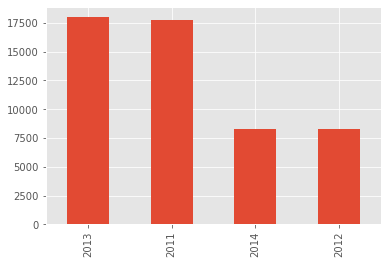

In [7]:
df.YearStart.value_counts().plot(kind='bar')

<AxesSubplot:>

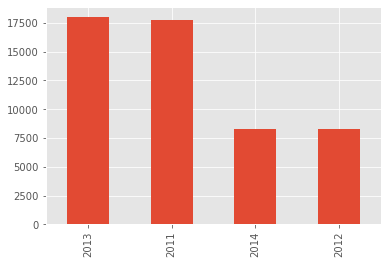

In [8]:
df.YearEnd.value_counts().plot(kind='bar')

In [9]:
df[df.YearStart == df.YearEnd] 

YearStart  YearEnd LocationAbbr   LocationDesc                                  Datasource                             Topic                                           Question Data_Value_Type  Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  Total Age(years)              Education  Gender Income Race/Ethnicity                               GeoLocation ClassID TopicID QuestionID DataValueTypeID  LocationID StratificationCategory1        Stratification1 StratificationCategoryId1 StratificationID1                    Class
0           2011     2011           AL        Alabama  Behavioral Risk Factor Surveillance System           Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value   32.000000             30.500000               33.500000  7304.000000  Total        NaN                    NaN     NaN    NaN            NaN   (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE    1.000000                   Total                  Total                       OVR           OVERALL  Obesity / Weight Status
1           2011     2011           AL        Alabama  Behavioral Risk Factor Surveillance System           Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value   32.300000             29.900000               34.700000  2581.000000    NaN        NaN                    NaN    Male    NaN            NaN   (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE    1.000000                  Gender                   Male                       GEN              MALE  Obesity / Weight Status
2           2011     2011           AL        Alabama  Behavioral Risk Factor Surveillance System           Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value   31.800000             30.000000               33.600000  4723.000000    NaN        NaN                    NaN  Female    NaN            NaN   (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE    1.000000                  Gender                 Female                       GEN            FEMALE  Obesity / Weight Status
3           2011     2011           AL        Alabama  Behavioral Risk Factor Surveillance System           Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value   33.600000             29.900000               37.600000  1153.000000    NaN        NaN  Less than high school     NaN    NaN            NaN   (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE    1.000000               Education  Less than high school                       EDU             EDUHS  Obesity / Weight Status
4           2011     2011           AL        Alabama  Behavioral Risk Factor Surveillance System           Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value   32.800000             30.200000               35.600000  2402.000000    NaN        NaN   High school graduate     NaN    NaN            NaN   (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE    1.000000               Education   High school graduate                       EDU         EDUHSGRAD  Obesity / Weight Status
...          ...      ...          ...            ...                                         ...                               ...                                                ...             ...         ...                   ...                     ...          ...    ...        ...                    ...     ...    ...            ...                                       ...     ...     ...        ...             ...         ...                     ...                    ...                       ...               ...                      ...
52340       2014     2014           IN        Arizona  Behavioral Risk Factor Surveillance System  Fruits and Vegetables - Behavi

<AxesSubplot:>

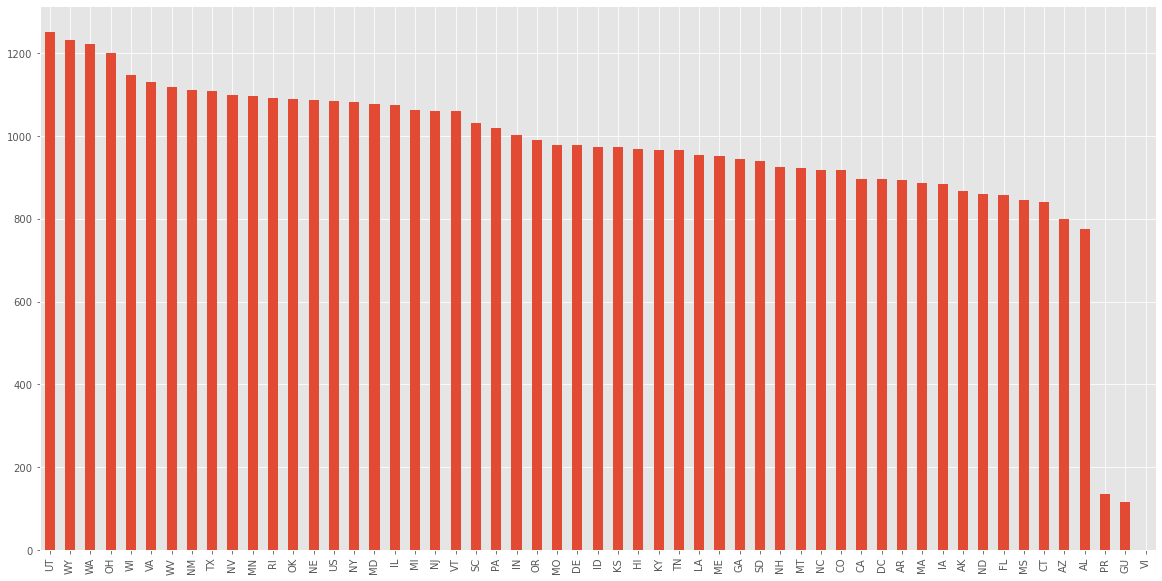

In [10]:
plt.figure(figsize=(20,10))
df.LocationAbbr.value_counts().plot(kind='bar')

In [11]:
df.LocationAbbr.value_counts()

UT    1250
WY    1231
WA    1221
OH    1201
WI    1148
VA    1129
WV    1119
NM    1110
TX    1108
NV    1098
MN    1097
RI    1092
OK    1090
NE    1086
US    1084
NY    1082
MD    1076
IL    1075
MI    1063
NJ    1059
VT    1059
SC    1031
PA    1018
IN    1003
OR     990
MO     979
DE     977
ID     972
KS     972
HI     968
KY     967
TN     965
LA     954
ME     951
GA     944
SD     940
NH     926
MT     923
NC     918
CO     917
CA     895
DC     895
AR     893
MA     886
IA     884
AK     868
ND     860
FL     857
MS     846
CT     841
AZ     800
AL     774
PR     135
GU     117
VI       1
Name: LocationAbbr, dtype: int64

In [12]:
df.LocationDesc.value_counts()

Colorado                1219
Alabama                 1204
California              1179
Arizona                 1167
Maryland                1163
Minnesota               1163
Connecticut             1147
Florida                 1132
Hawaii                  1117
Kansas                  1115
Georgia                 1113
Illinois                1100
Michigan                1097
Arkansas                1075
National                1072
Alaska                  1070
Kentucky                1069
Missouri                1048
Delaware                1046
Massachusetts           1040
Idaho                   1039
New Mexico              1039
Indiana                 1035
Iowa                    1017
Ohio                    1017
Rhode Island            1013
Nebraska                1004
Oklahoma                1004
Louisiana                995
New York                 986
Montana                  984
New Jersey               982
Maine                    967
North Carolina           962
District of Co

<AxesSubplot:>

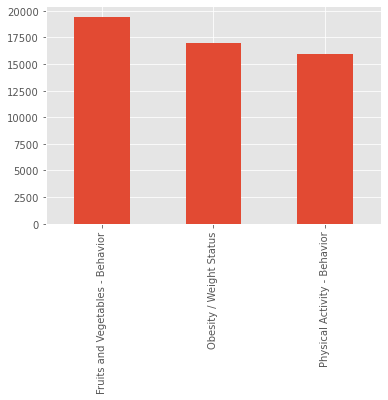

In [13]:
df.Topic.value_counts().plot(kind='bar')

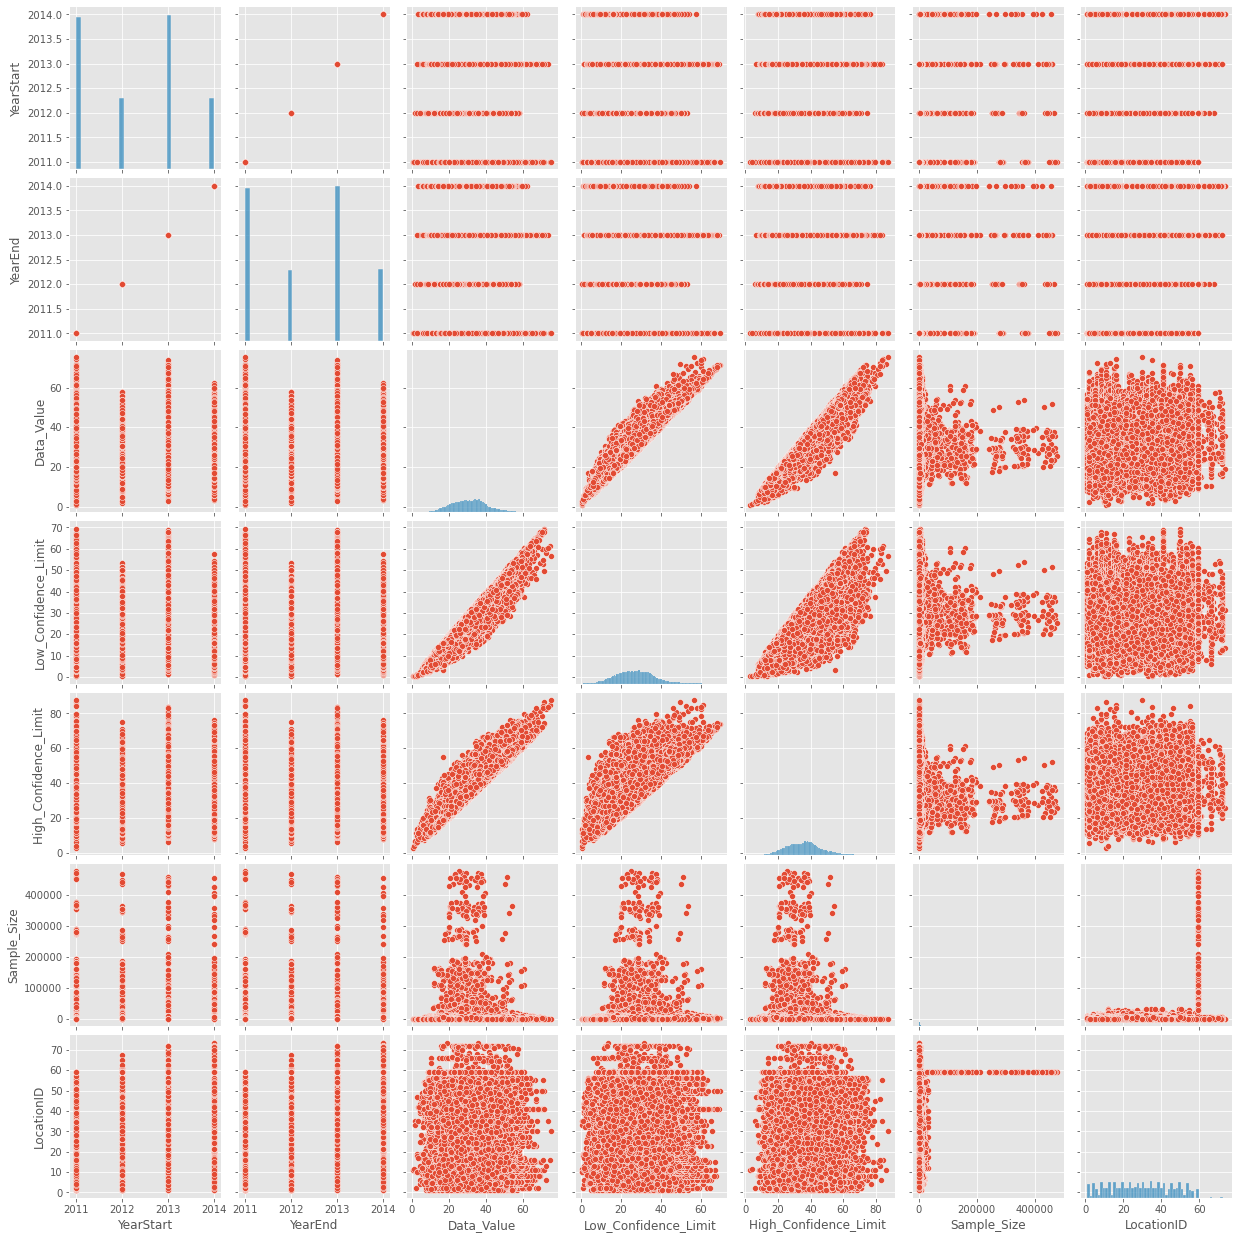

In [14]:
sns.pairplot(df)

In [15]:
df.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Topic                            0
Question                         0
Data_Value_Type                  0
Data_Value                       0
Low_Confidence_Limit             0
High_Confidence_Limit            0
Sample_Size                      0
Total                        50544
Age(years)                   41530
Education                    45592
Gender                       49029
Income                       39123
Race/Ethnicity               42220
GeoLocation                   1057
ClassID                          0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
Class               

In [16]:
df.nunique()

YearStart                        4
YearEnd                          4
LocationAbbr                    55
LocationDesc                    55
Datasource                       1
Topic                            3
Question                         9
Data_Value_Type                  1
Data_Value                   20801
Low_Confidence_Limit         20839
High_Confidence_Limit        20887
Sample_Size                  25919
Total                            1
Age(years)                       6
Education                        4
Gender                           2
Income                           7
Race/Ethnicity                   8
GeoLocation                     54
ClassID                          3
TopicID                          3
QuestionID                       9
DataValueTypeID                  1
LocationID                   15946
StratificationCategory1          6
Stratification1                 28
StratificationCategoryId1        6
StratificationID1               28
Class               

In [17]:
null_values = df.isnull().sum()


In [18]:
for i,name in enumerate((null_values)):
    print(name)

0
0
0
0
0
0
0
0
0
0
0
0
50544
41530
45592
49029
39123
42220
1057
0
0
0
0
0
0
0
0
0
0


In [19]:
def percentage_null(df):
    for i,name in enumerate(df.columns):
        if null_values[i] > 0:
            print('The Percentage of Null Values in {} is {}'.format(name,null_values[i]/df.shape[0]))

In [20]:
percentage_null(df)

The Percentage of Null Values in Total is 0.9655936574648963
The Percentage of Null Values in Age(years) is 0.7933900085968096
The Percentage of Null Values in Education is 0.8709905435094087
The Percentage of Null Values in Gender is 0.9366510650491928
The Percentage of Null Values in Income is 0.7474066290954245
The Percentage of Null Values in Race/Ethnicity is 0.8065717833603974
The Percentage of Null Values in GeoLocation is 0.02019295061610469


In [21]:
df.head()

YearStart  YearEnd LocationAbbr LocationDesc                                  Datasource                    Topic                                           Question Data_Value_Type  Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  Total Age(years)              Education  Gender Income Race/Ethnicity                              GeoLocation ClassID TopicID QuestionID DataValueTypeID  LocationID StratificationCategory1        Stratification1 StratificationCategoryId1 StratificationID1                    Class
0       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.0                  30.5                    33.5       7304.0  Total        NaN                    NaN     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                   Total                  Total                       OVR           OVERALL  Obesity / Weight Status
1       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.3                  29.9                    34.7       2581.0    NaN        NaN                    NaN    Male    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                  Gender                   Male                       GEN              MALE  Obesity / Weight Status
2       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        31.8                  30.0                    33.6       4723.0    NaN        NaN                    NaN  Female    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                  Gender                 Female                       GEN            FEMALE  Obesity / Weight Status
3       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        33.6                  29.9                    37.6       1153.0    NaN        NaN  Less than high school     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0               Education  Less than high school                       EDU             EDUHS  Obesity / Weight Status
4       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.8                  30.2                    35.6       2402.0    NaN        NaN   High school graduate     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0               Education   High school graduate                       EDU         EDUHSGRAD  Obesity / Weight Status

<AxesSubplot:>

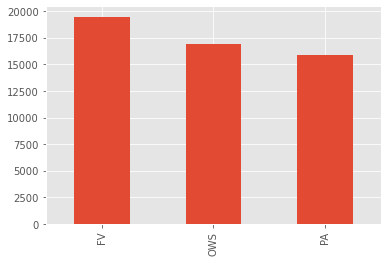

In [22]:
df.ClassID.value_counts().plot(kind='bar')

<AxesSubplot:>

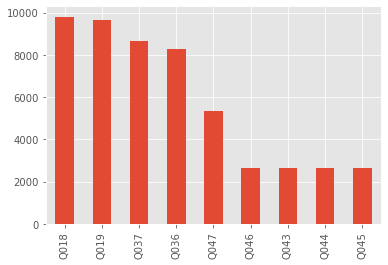

In [23]:
df.QuestionID.value_counts().plot(kind='bar')

<AxesSubplot:>

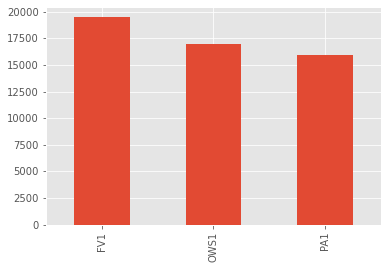

In [24]:
df.TopicID.value_counts().plot(kind='bar')

In [25]:
df.LocationID.value_counts()

59.000000    1008
2.000000      748
11.000000     744
35.000000     735
5.000000      734
             ... 
30.815253       1
39.075596       1
13.495568       1
27.029254       1
29.016852       1
Name: LocationID, Length: 15946, dtype: int64

<AxesSubplot:>

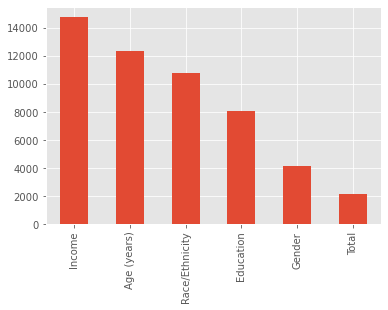

In [26]:
df.StratificationCategory1.value_counts().plot(kind='bar')

<AxesSubplot:>

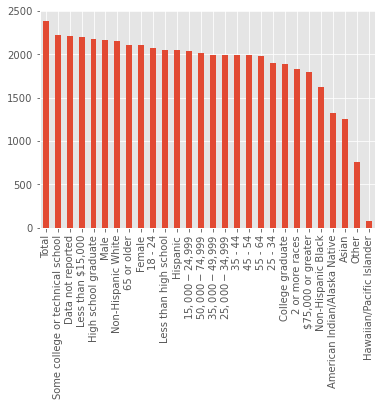

In [27]:
df.Stratification1.value_counts().plot(kind='bar')

In [28]:
df.StratificationID1.value_counts()

OVERALL        2332
INC5075        2201
INCLESS15      2174
AGEYR65PLUS    2172
INC3550        2131
INCNR          2129
MALE           2110
AGEYR1824      2109
EDUHSGRAD      2108
FEMALE         2095
EDUCOTEC       2089
RACEWHT        2054
INC2535        2048
AGEYR4554      2025
AGEYR3544      2025
INC1525        2014
AGEYR5564      2005
RACEHIS        1989
AGEYR2534      1974
INC75PLUS      1966
EDUHS          1935
EDUCOGRAD      1863
RACE2PLUS      1827
RACEBLK        1519
RACENAA        1382
RACEASN        1242
RACEOTH         751
RACEHPI          76
Name: StratificationID1, dtype: int64

In [29]:
df.Class.value_counts()

Fruits and Vegetables      19464
Obesity / Weight Status    16957
Physical Activity          15924
Name: Class, dtype: int64

In [30]:
object_columns = df.select_dtypes(include='object').columns

In [31]:
object_columns.shape

(22,)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52345 entries, 0 to 52344
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  52345 non-null  int64  
 1   YearEnd                    52345 non-null  int64  
 2   LocationAbbr               52345 non-null  object 
 3   LocationDesc               52345 non-null  object 
 4   Datasource                 52345 non-null  object 
 5   Topic                      52345 non-null  object 
 6   Question                   52345 non-null  object 
 7   Data_Value_Type            52345 non-null  object 
 8   Data_Value                 52345 non-null  float64
 9   Low_Confidence_Limit       52345 non-null  float64
 10  High_Confidence_Limit      52345 non-null  float64
 11  Sample_Size                52345 non-null  float64
 12  Total                      1801 non-null   object 
 13  Age(years)                 10815 non-null  obj

In [33]:
df.nunique()

YearStart                        4
YearEnd                          4
LocationAbbr                    55
LocationDesc                    55
Datasource                       1
Topic                            3
Question                         9
Data_Value_Type                  1
Data_Value                   20801
Low_Confidence_Limit         20839
High_Confidence_Limit        20887
Sample_Size                  25919
Total                            1
Age(years)                       6
Education                        4
Gender                           2
Income                           7
Race/Ethnicity                   8
GeoLocation                     54
ClassID                          3
TopicID                          3
QuestionID                       9
DataValueTypeID                  1
LocationID                   15946
StratificationCategory1          6
Stratification1                 28
StratificationCategoryId1        6
StratificationID1               28
Class               

In [34]:
df.head()

YearStart  YearEnd LocationAbbr LocationDesc                                  Datasource                    Topic                                           Question Data_Value_Type  Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  Total Age(years)              Education  Gender Income Race/Ethnicity                              GeoLocation ClassID TopicID QuestionID DataValueTypeID  LocationID StratificationCategory1        Stratification1 StratificationCategoryId1 StratificationID1                    Class
0       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.0                  30.5                    33.5       7304.0  Total        NaN                    NaN     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                   Total                  Total                       OVR           OVERALL  Obesity / Weight Status
1       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.3                  29.9                    34.7       2581.0    NaN        NaN                    NaN    Male    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                  Gender                   Male                       GEN              MALE  Obesity / Weight Status
2       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        31.8                  30.0                    33.6       4723.0    NaN        NaN                    NaN  Female    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0                  Gender                 Female                       GEN            FEMALE  Obesity / Weight Status
3       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        33.6                  29.9                    37.6       1153.0    NaN        NaN  Less than high school     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0               Education  Less than high school                       EDU             EDUHS  Obesity / Weight Status
4       2011     2011           AL      Alabama  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value        32.8                  30.2                    35.6       2402.0    NaN        NaN   High school graduate     NaN    NaN            NaN  (32.84057112200048, -86.63186076199969)     OWS    OWS1       Q036           VALUE         1.0               Education   High school graduate                       EDU         EDUHSGRAD  Obesity / Weight Status

In [35]:
df1 = df.drop(['LocationDesc','Datasource','Question','Data_Value_Type','Total','Age(years)','Education','Gender','Income','Race/Ethnicity','GeoLocation','TopicID','QuestionID','StratificationCategory1','StratificationID1','YearStart','YearEnd','ClassID','Class','Topic'],axis=1)

In [36]:
df1.head()

LocationAbbr  Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size DataValueTypeID  LocationID        Stratification1 StratificationCategoryId1
0           AL        32.0                  30.5                    33.5       7304.0           VALUE         1.0                  Total                       OVR
1           AL        32.3                  29.9                    34.7       2581.0           VALUE         1.0                   Male                       GEN
2           AL        31.8                  30.0                    33.6       4723.0           VALUE         1.0                 Female                       GEN
3           AL        33.6                  29.9                    37.6       1153.0           VALUE         1.0  Less than high school                       EDU
4           AL        32.8                  30.2                    35.6       2402.0           VALUE         1.0   High school graduate                       EDU

In [37]:
df1.shape

(52345, 9)

In [38]:
df1.LocationAbbr.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CT', 'CO', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'US', 'NE', 'NH', 'NV', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'GU', 'PR', 'VI'],
      dtype=object)

In [39]:
df1.DataValueTypeID.unique()

array(['VALUE'], dtype=object)

In [40]:
df1 = df1.drop(['DataValueTypeID'],axis=1)

In [41]:
df1

LocationAbbr  Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  LocationID        Stratification1 StratificationCategoryId1
0               AL   32.000000             30.500000               33.500000  7304.000000    1.000000                  Total                       OVR
1               AL   32.300000             29.900000               34.700000  2581.000000    1.000000                   Male                       GEN
2               AL   31.800000             30.000000               33.600000  4723.000000    1.000000                 Female                       GEN
3               AL   33.600000             29.900000               37.600000  1153.000000    1.000000  Less than high school                       EDU
4               AL   32.800000             30.200000               35.600000  2402.000000    1.000000   High school graduate                       EDU
...            ...         ...                   ...                     ...          ...         ...                    ...                       ...
52340           IN   43.148744             31.691960               55.396734   159.871859    8.912060               Hispanic                      RACE
52341           OK   47.997376             43.040983               52.881966   825.537695   41.973763      $15,000 - $24,999                       INC
52342           NH   19.675684              9.617520               36.132657    55.139452   33.860548                  Asian                      RACE
52343           WV   52.539239             40.313500               64.446413   130.535869   64.886085                18 - 24                      RACE
52344           WY   17.162706             15.751715               18.584689  5819.000000   35.527954                 Female                       GEN

[52345 rows x 8 columns]

In [42]:
df1.Stratification1.value_counts()

Total                               2389
Some college or technical school    2223
Data not reported                   2208
Less than $15,000                   2195
High school graduate                2180
Male                                2167
Non-Hispanic White                  2159
65 or older                         2105
Female                              2103
18 - 24                             2070
Less than high school               2050
Hispanic                            2046
$15,000 - $24,999                   2041
$50,000 - $74,999                   2010
$35,000 - $49,999                   1992
$25,000 - $34,999                   1990
35 - 44                             1989
45 - 54                             1988
55 - 64                             1984
25 - 34                             1902
College graduate                    1886
2 or more races                     1829
$75,000 or greater                  1801
Non-Hispanic Black                  1624
American Indian/

In [43]:
df1 = df1.drop(['Stratification1'],axis=1)

In [44]:
df1.head()

LocationAbbr  Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  LocationID StratificationCategoryId1
0           AL        32.0                  30.5                    33.5       7304.0         1.0                       OVR
1           AL        32.3                  29.9                    34.7       2581.0         1.0                       GEN
2           AL        31.8                  30.0                    33.6       4723.0         1.0                       GEN
3           AL        33.6                  29.9                    37.6       1153.0         1.0                       EDU
4           AL        32.8                  30.2                    35.6       2402.0         1.0                       EDU

In [45]:
df1.shape

(52345, 7)

In [46]:
df1.StratificationCategoryId1.value_counts()

INC      15101
AGEYR    11814
RACE     11055
EDU       8004
GEN       4194
OVR       2177
Name: StratificationCategoryId1, dtype: int64

In [47]:
df2 = pd.get_dummies(df1)

In [48]:
df2.head()

Data_Value  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  LocationID  LocationAbbr_AK  LocationAbbr_AL  LocationAbbr_AR  LocationAbbr_AZ  LocationAbbr_CA  LocationAbbr_CO  LocationAbbr_CT  LocationAbbr_DC  LocationAbbr_DE  LocationAbbr_FL  LocationAbbr_GA  LocationAbbr_GU  LocationAbbr_HI  LocationAbbr_IA  LocationAbbr_ID  LocationAbbr_IL  LocationAbbr_IN  LocationAbbr_KS  LocationAbbr_KY  LocationAbbr_LA  LocationAbbr_MA  LocationAbbr_MD  LocationAbbr_ME  LocationAbbr_MI  LocationAbbr_MN  LocationAbbr_MO  LocationAbbr_MS  LocationAbbr_MT  LocationAbbr_NC  LocationAbbr_ND  LocationAbbr_NE  LocationAbbr_NH  LocationAbbr_NJ  LocationAbbr_NM  LocationAbbr_NV  LocationAbbr_NY  LocationAbbr_OH  LocationAbbr_OK  LocationAbbr_OR  LocationAbbr_PA  LocationAbbr_PR  LocationAbbr_RI  LocationAbbr_SC  LocationAbbr_SD  LocationAbbr_TN  LocationAbbr_TX  LocationAbbr_US  LocationAbbr_UT  LocationAbbr_VA  LocationAbbr_VI  LocationAbbr_VT  LocationAbbr_WA  LocationAbbr_WI  \
0        32.0                  30.5                    33.5       7304.0         1.0                0                1                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0   
1        32.3                  29.9                    34.7       2581.0         1.0                0                1                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0   
2        31.8                  30.0                    33.6       4723.0         1.0                0                1                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0                0   
3        33.6                  29.9            

In [49]:
df2.shape

(52345, 66)

In [50]:
X = df2.drop('Data_Value',axis=1)
y = df2.Data_Value

In [51]:
X.shape[1]

65

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
rmse = tf.keras.metrics.RootMeanSquaredError()

In [55]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(X.shape[1],))),
model.add(Dense(10,activation='relu')),
model.add(Dense(10,activation='relu')),
model.add(Dense(1))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                660       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=[rmse,'mae'])

In [58]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1309/1309 [==============================] - 1s 1ms/step - loss: 2724.9878 - root_mean_squared_error: 52.2014 - mae: 12.2020
Epoch 2/100
1309/1309 [==============================] - 1s 995us/step - loss: 1042.8890 - root_mean_squared_error: 32.2938 - mae: 4.3332
Epoch 3/100
1309/1309 [==============================] - 1s 1ms/step - loss: 298.5055 - root_mean_squared_error: 17.2773 - mae: 4.3446
Epoch 4/100
1309/1309 [==============================] - 1s 986us/step - loss: 80.9540 - root_mean_squared_error: 8.9974 - mae: 2.4731
Epoch 5/100
1309/1309 [==============================] - 1s 951us/step - loss: 236.3019 - root_mean_squared_error: 15.3721 - mae: 2.4537
Epoch 6/100
1309/1309 [==============================] - 1s 1ms/step - loss: 37.1257 - root_mean_squared_error: 6.0931 - mae: 1.9510
Epoch 7/100
1309/1309 [==============================] - 1s 1ms/step - loss: 28.0827 - root_mean_squared_error: 5.2993 - mae: 1.4894
Epoch 8/100
1309/1309 [=============================

In [59]:
model.evaluate(X_test,y_test)

328/328 [==============================] - 0s 896us/step - loss: 0.2185 - root_mean_squared_error: 0.4674 - mae: 0.2351


[0.21845582127571106, 0.46739256381988525, 0.23510140180587769]

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([[33.856873],
       [27.369116],
       [18.935753],
       ...,
       [29.11452 ],
       [26.93497 ],
       [22.608383]], dtype=float32)

### Test Data

In [73]:
test_data = pd.read_csv('Test_data.csv')
test_data.head()

YearStart  YearEnd LocationAbbr LocationDesc                                  Datasource                    Topic                                           Question Data_Value_Type  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  Total Age(years)              Education  Gender Income Race/Ethnicity GeoLocation ClassID TopicID QuestionID DataValueTypeID  LocationID StratificationCategory1        Stratification1 StratificationCategoryId1 StratificationID1                    Class
0       2016     2016           US     National  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value                  34.9                    35.5     438479.0  Total        NaN                    NaN     NaN    NaN            NaN         NaN     OWS    OWS1       Q037           VALUE        59.0                   Total                  Total                       OVR           OVERALL  Obesity / Weight Status
1       2016     2016           US     National  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value                  40.6                    41.5     198440.0    NaN        NaN                    NaN    Male    NaN            NaN         NaN     OWS    OWS1       Q037           VALUE        59.0                  Gender                   Male                       GEN              MALE  Obesity / Weight Status
2       2016     2016           US     National  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value                  28.9                    29.7     240000.0    NaN        NaN                    NaN  Female    NaN            NaN         NaN     OWS    OWS1       Q037           VALUE        59.0                  Gender                 Female                       GEN            FEMALE  Obesity / Weight Status
3       2016     2016           US     National  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value                  33.6                    35.7      32325.0    NaN        NaN  Less than high school     NaN    NaN            NaN         NaN     OWS    OWS1       Q037           VALUE        59.0               Education  Less than high school                       EDU             EDUHS  Obesity / Weight Status
4       2016     2016           US     National  Behavioral Risk Factor Surveillance System  Obesity / Weight Status  Percent of adults aged 18 years and older who ...           Value                  33.7                    34.8     123241.0    NaN        NaN   High school graduate     NaN    NaN            NaN         NaN     OWS    OWS1       Q037           VALUE        59.0               Education   High school graduate                       EDU         EDUHSGRAD  Obesity / Weight Status

In [74]:
test_data.nunique()

YearStart                       1
YearEnd                         1
LocationAbbr                   55
LocationDesc                   55
Datasource                      1
Topic                           2
Question                        3
Data_Value_Type                 1
Low_Confidence_Limit          856
High_Confidence_Limit         942
Sample_Size                  2219
Total                           1
Age(years)                      6
Education                       4
Gender                          2
Income                          7
Race/Ethnicity                  8
GeoLocation                    54
ClassID                         2
TopicID                         2
QuestionID                      3
DataValueTypeID                 1
LocationID                    241
StratificationCategory1         6
Stratification1                28
StratificationCategoryId1       6
StratificationID1              28
Class                           2
dtype: int64

In [75]:
test_data = test_data.drop(['LocationDesc','Datasource','Question','Data_Value_Type','Total','Age(years)','Education','Gender','Income','Race/Ethnicity','GeoLocation','TopicID','QuestionID','StratificationCategory1','StratificationID1','YearStart','YearEnd','ClassID','Class','Topic'],axis=1)

In [76]:
test_data.shape

(4636, 8)

In [77]:
test_data = test_data.drop(['DataValueTypeID'],axis=1)

In [78]:
test_data = test_data.drop(['Stratification1'],axis=1)

In [79]:
test_data.head()

LocationAbbr  Low_Confidence_Limit  High_Confidence_Limit   Sample_Size  LocationID StratificationCategoryId1
0           US                  34.9                    35.5     438479.0        59.0                       OVR
1           US                  40.6                    41.5     198440.0        59.0                       GEN
2           US                  28.9                    29.7     240000.0        59.0                       GEN
3           US                  33.6                    35.7      32325.0        59.0                       EDU
4           US                  33.7                    34.8     123241.0        59.0                       EDU

In [80]:
test_data.shape

(4636, 6)

In [81]:
test_data = pd.get_dummies(test_data)

In [82]:
test_data.shape

(4636, 65)

In [84]:
prediction = model.predict(test_data)

In [85]:
submission_file = pd.DataFrame(prediction, columns = ['prediction'])

In [86]:
submission_file

prediction
0      32.207893
1      34.513214
2      26.711802
3      33.883194
4      30.066843
...          ...
4631   36.274559
4632   37.493000
4633   29.895203
4634   44.128731
4635   32.697014

[4636 rows x 1 columns]

In [87]:
submission_file.to_csv('final_submission.csv')

In [1]:
import tensorflow as tf

In [3]:
len(tf.config.experimental.list_physical_devices('GPU'))

0

In [4]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']
